In [1]:
import numpy as np
from chandra_aca.star_probs import guide_count, snr_mag_for_t_ccd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mags = np.arange(9.5, 10.5, 0.001)
cts = [guide_count(mag, t_ccd=-10.9) for mag in mags]

In [3]:
def guide_count_424(mags, t_ccd):
    """
    Given mags from guide stars and a temperature, calculate a guide star
    fractional count/metric using signal-to-noise scaled mag thresholds.
    This uses guide star fractional counts that were suggested at the 7-Mar-2018
    SSAWG and agreed upon at the 21-Mar-2018 SSAWG.  The implementation here
    uses the ACA planning limit at that time (-10.9C) as the reference temperature.
    :param mags: mags of guide star catalog stars
    :param t_ccd: ACA CCD temperature at expected time of observation
    :returns: fractional count
    """
    # The bright limit does not scale.
    thresh0 = 5.9
    thresh1 = snr_mag_for_t_ccd(t_ccd, ref_mag=10.0, ref_t_ccd=-10.9)
    thresh2 = snr_mag_for_t_ccd(t_ccd, ref_mag=10.2, ref_t_ccd=-10.9)
    thresh3 = snr_mag_for_t_ccd(t_ccd, ref_mag=10.3, ref_t_ccd=-10.9)
    counts = np.zeros(len(mags))
    counts[(mags <= thresh1) & (mags > thresh0)] = 1.0
    counts[(mags <= thresh2) & (mags > thresh1)] = 0.75
    counts[(mags <= thresh3) & (mags > thresh2)] = 0.5
    return np.sum(counts)

In [4]:
cts424 = [guide_count_424(np.array([mag]), t_ccd=-10.9) for mag in mags]

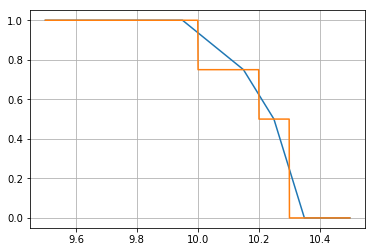

In [5]:
plt.plot(mags, cts)
plt.plot(mags, cts424)
plt.grid()

In [13]:
guide_count([10.12]*5, -10.9)

3.9374999999999964